In [1]:
import warnings
import pandas as pd
import numpy as np
import datetime
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def predictSVM(data,company):
    data.index=pd.to_datetime(data['Date'])
    data=data.drop(['Date'],axis='columns')
    data=data.loc['01-01-2007':]

    #data=data.loc['01-01-2008':'12-31-2011','01-01-2020':'12-31-2020','01-01-2021':'12-31-2021']
    #print(data)

    X=data[['Open','Close']]
    y=data[['Adjusted Close']]
    X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.3,random_state=None)

    model=SVR(kernel='rbf')
    model.fit(X_Train,y_Train)
    y_pred=model.predict(X_Test)
    #print(X)
    print("Mean squared error of",company,mean_squared_error(y_Test,y_pred))
    y_pred = pd.DataFrame(y_pred,index=y_Test.index,columns = ['Adjusted Close']) 

    ylabel=company+" Stock Price"
    
    y_pred.loc['01-01-2009':'12-31-2009'].plot(xlim=([datetime.date(2009, 1, 1), datetime.date(2009, 12, 31)]),title="Stock price during Swine flu",ylabel=ylabel,figsize=(8,5))
    
    y_pred.loc['01-01-2020':'12-31-2020'].plot(xlim=([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)]),title="Stock price during Covid-19 2020",ylabel=ylabel,figsize=(8,5))
    
    y_pred.loc['01-01-2021':'12-31-2021'].plot(xlim=([datetime.date(2021, 1, 1), datetime.date(2021, 12, 31)]),title="Stock price during Covid-19 2021",ylabel=ylabel,figsize=(8,5))
    
    plt.legend()    
    #plt.ylabel("Stock Price")  
    plt.show()
    
    return y_pred

Mean squared error of Apple 10.069506945246411


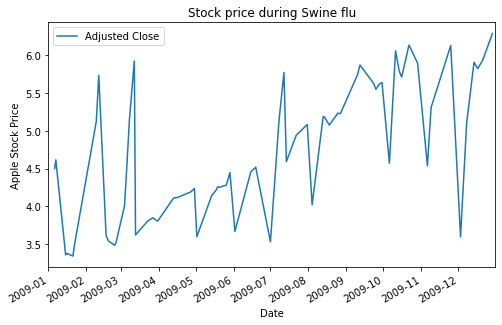

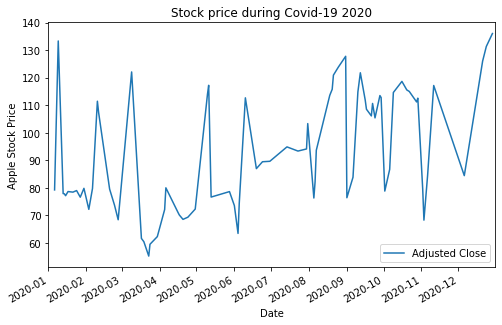

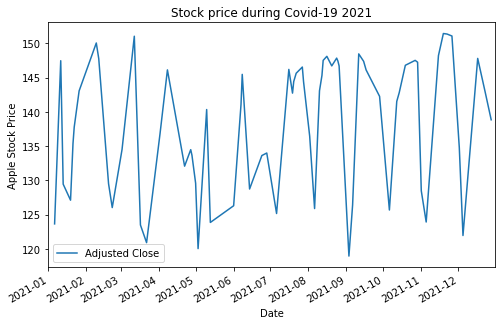

Mean squared error of Amazon 430383.39599665196


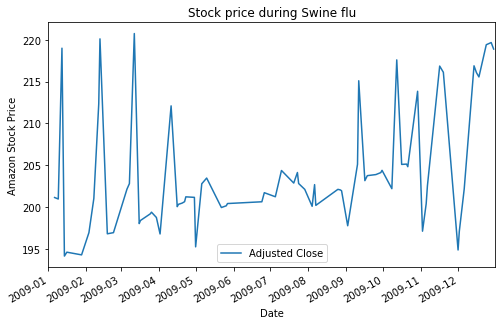

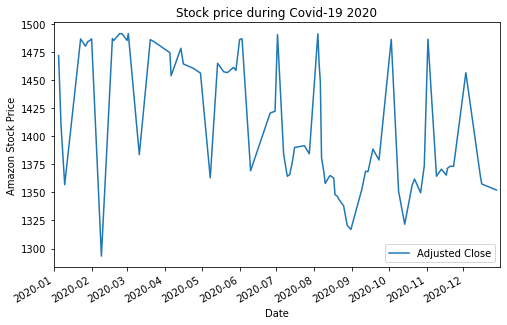

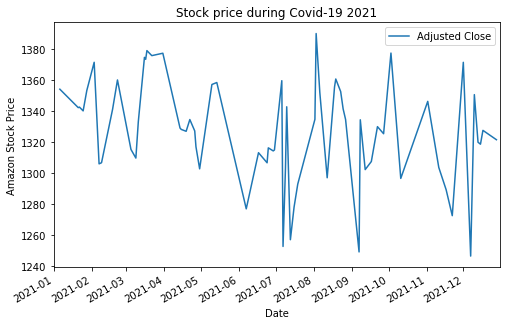

Mean squared error of Facebook 121.5865009065462


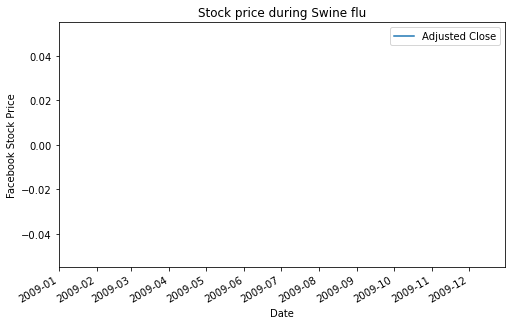

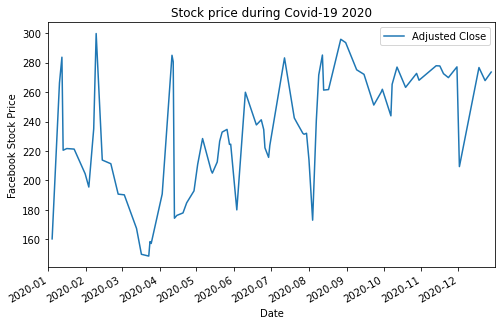

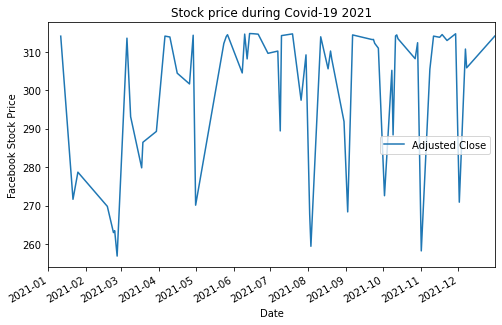

Mean squared error of Google 219415.0847842728


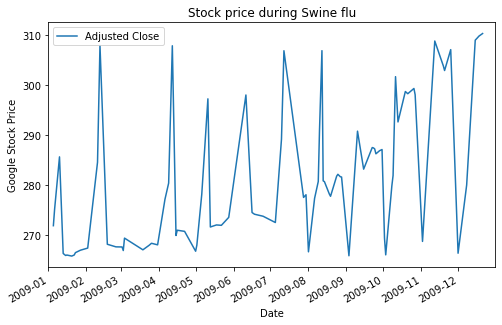

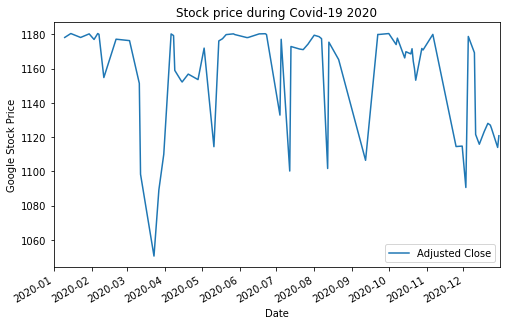

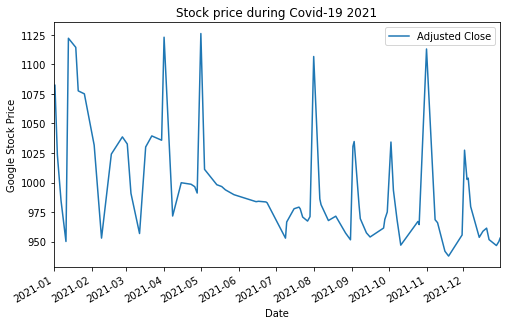

Mean squared error of Microsoft 121.90984007561809


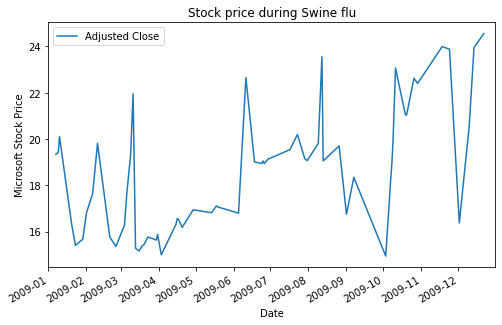

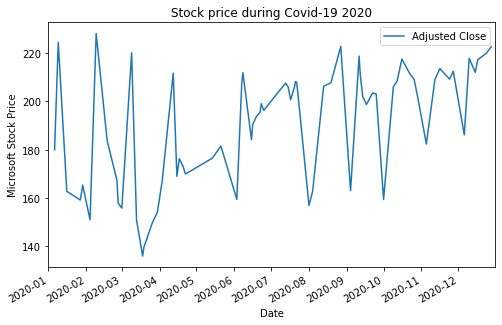

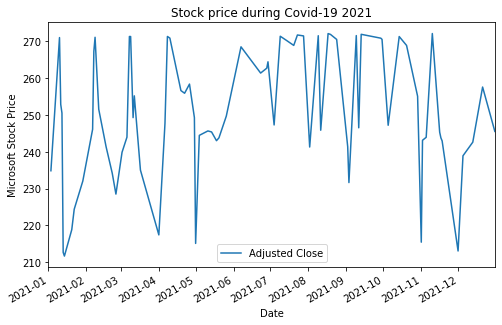

Mean squared error of Netflix 910.0263506778821


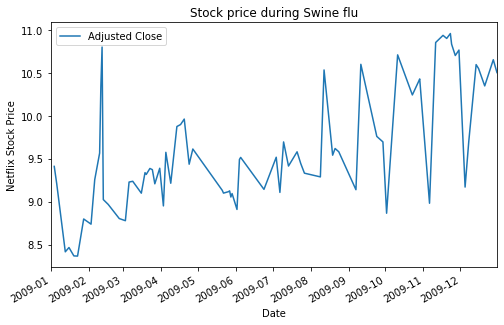

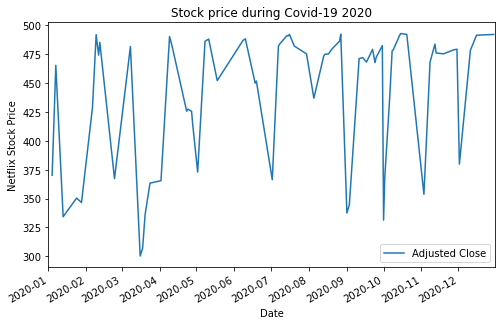

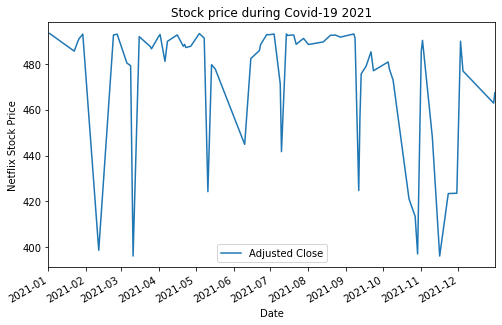

In [3]:
warnings.filterwarnings("ignore")

apple=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/AAPL.csv')
y_pred_apple=predictSVM(apple,"Apple")


amazon=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/AMZN.csv')
y_pred_amazon=predictSVM(amazon,"Amazon")


facebook=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/FB.csv')
y_pred_fb=predictSVM(facebook,"Facebook")


google=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/GOOG.csv')
y_pred_google=predictSVM(google,"Google")


microsoft=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/MSFT.csv')
y_pred_ms=predictSVM(microsoft,"Microsoft")

netflix=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/NFLX.csv')
y_pred_netflix=predictSVM(netflix,"Netflix")



#y_pred_apple